In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Bus-Amsterdam

## Generate bus networks

In [4]:
city_bus_stations, edges, nodes, city_bus_routes = prepare_bus(osm_path)

topology: 100%|████████████████████████████████████████████████████████████████| 71634/71634 [00:08<00:00, 8376.08it/s]


In [5]:
edges

,osm_id,geometry,service,id,from_id,to_id,distance,time,weights,to_from,from_to,railway
0,4436684,"LINESTRING (4.9683596 52.3558775, 4.9683345 52...",steps,0,0,1,4.049164,0.000324,4,"(0, 1)","(1, 0)",bus
1,4495957,"LINESTRING (4.8601784 52.357593, 4.8601399 52....",steps,1,2,3,7.754968,0.000620,7,"(2, 3)","(3, 2)",bus
2,4496429,"LINESTRING (4.8743983 52.358788, 4.8744747 52....",service,2,4,5,68.807947,0.005505,68,"(4, 5)","(5, 4)",bus
3,4727308,"LINESTRING (4.9563878 52.377293, 4.9564629 52....",path,3,6,65237,46.383298,0.003711,46,"(6, 65237)","(65237, 6)",bus
4,4727308,"LINESTRING (4.9564856 52.376881, 4.9564944 52....",path,4,65237,7,2.090290,0.000167,2,"(65237, 7)","(7, 65237)",bus
...,...,...,...,...,...,...,...,...,...,...,...,...
71623,1185077512,"LINESTRING (4.795149 52.3318873, 4.7953163 52....",service,71623,65586,65587,29.884042,0.002391,29,"(65586, 65587)","(65587, 65586)",bus
71624,1185077519,"LINESTRING (4.7974835 52.3325307, 4.7972201 52...",service,71624,65588,65589,19.267219,0.001541,19,"(65588, 65589)","(65589, 65588)",bus
71625,1185077520,"LINESTRING (4.7967795 52.3323057, 4.7972519 52...",service,71625,65590,65591,34.723141,0.002778,34,"(65590, 65591)","(65591, 65590)",bus
71626,1185077524,"LINESTRING (4.7997017 52.3324389, 4.7997688 52...",path,71626,65592,65593,65.462451,0.005237,65,"(65592, 65593)","(65593, 65592)",bus


In [6]:
nodes

,geometry,degree,id
0,POINT (4.9683596 52.3558775),1,0
1,POINT (4.9683118 52.3558559),1,1
2,POINT (4.8601784 52.357593),1,2
3,POINT (4.8601399 52.3576586),1,3
4,POINT (4.8743983 52.358788),1,4
...,...,...,...
68437,POINT (4.8808204 52.3586774),0,68437
68438,POINT (4.8688259 52.3392455),2,68438
68439,POINT (4.8690257 52.3316423),2,68439
68440,POINT (4.8705297 52.3165252),2,68440


In [7]:
city_bus_routes

,osm_id,route,to,name,ref,network,service,geometry
31,73789,bus,Amsterdam Muiderpoortstation,Bus 40: Amsterdam Amstelstation => Amsterdam M...,40,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.91869 52.34617, 4.91868 52..."
37,146350,bus,"Schiphol, Airport/Plaza",Bus 365: Leiden Centraal Station => Schiphol A...,365,Zuid-Holland Noord,None,"MULTILINESTRING ((4.76218 52.30830, 4.76200 52..."
44,156123,bus,Marken Minneweg,Bus 315: Amsterdam Station Noord => Marken Min...,315,Waterland,None,"MULTILINESTRING ((4.93321 52.40187, 4.93311 52..."
52,161790,bus,"Nieuw Vennep, P+R Getsewoud Zuid",Bus 397: Amsterdam Busstation Elandsgracht → N...,397,Amstelland-Meerlanden,None,"MULTILINESTRING ((4.87678 52.36968, 4.87687 52..."
91,169215,bus,"Haarlem, Station",Bus 300: Amsterdam Bijlmer ArenA → Haarlem Sta...,300,Amstelland-Meerlanden,None,"MULTILINESTRING ((4.94705 52.31143, 4.94711 52..."
...,...,...,...,...,...,...,...,...
1446,13630218,bus,"Amsterdam, Station Noord",Bus 292: Zaandam De Vlinder => Amsterdam Stati...,292,Zaanstreek,None,"MULTILINESTRING ((4.85659 52.42963, 4.85664 52..."
1447,13631642,bus,"Assendelft, Festina Lente",Bus 63: Zaandam Station => Assendelft Festina ...,63,Zaanstreek,None,"MULTILINESTRING ((4.81643 52.43588, 4.81651 52..."
1448,13633193,bus,"Zaandam, Station",Bus 63: Assendelft Festina Lente => Zaandam St...,63,Zaanstreek,None,"MULTILINESTRING ((4.81436 52.43590, 4.81452 52..."
1470,14979096,bus,"Amsterdam, Station Bijlmer ArenA",Bus 330: Almere Station Buiten => Amsterdam St...,330,Busvervoer Almere,None,"MULTILINESTRING ((5.05775 52.32570, 5.05723 52..."


In [8]:
city_bus_routes = city_bus_routes.loc[city_bus_routes.network == 'Stadsvervoer Amsterdam']
city_bus_routes = city_bus_routes.loc[city_bus_routes.service != 'night']

In [9]:
city_bus_routes, check_name = check_bus_routes(city_bus_stations, city_bus_routes)

In [10]:
replacement_dict = {
    'Amsterdam, ': '',
    'Amsterdam': '',
    'Weesp Station': 'Station',
    'Osdorp De Aker': 'Matterhorn',
    'Schiphol, Airport/Plaza': 'Schiphol, Airport',
    'De Boelelaan': 'De Boelelaan/De Klencke'
}
replacement_dict1 = {
    'Amsterdam, ': '',
    'Amsterdam': '',
}

city_bus_stations['name'] = city_bus_stations['name'].replace(replacement_dict1, regex=True).str.strip()

city_bus_stations, city_bus_routes, check_name = recheck_bus_routes(replacement_dict, city_bus_stations, city_bus_routes)

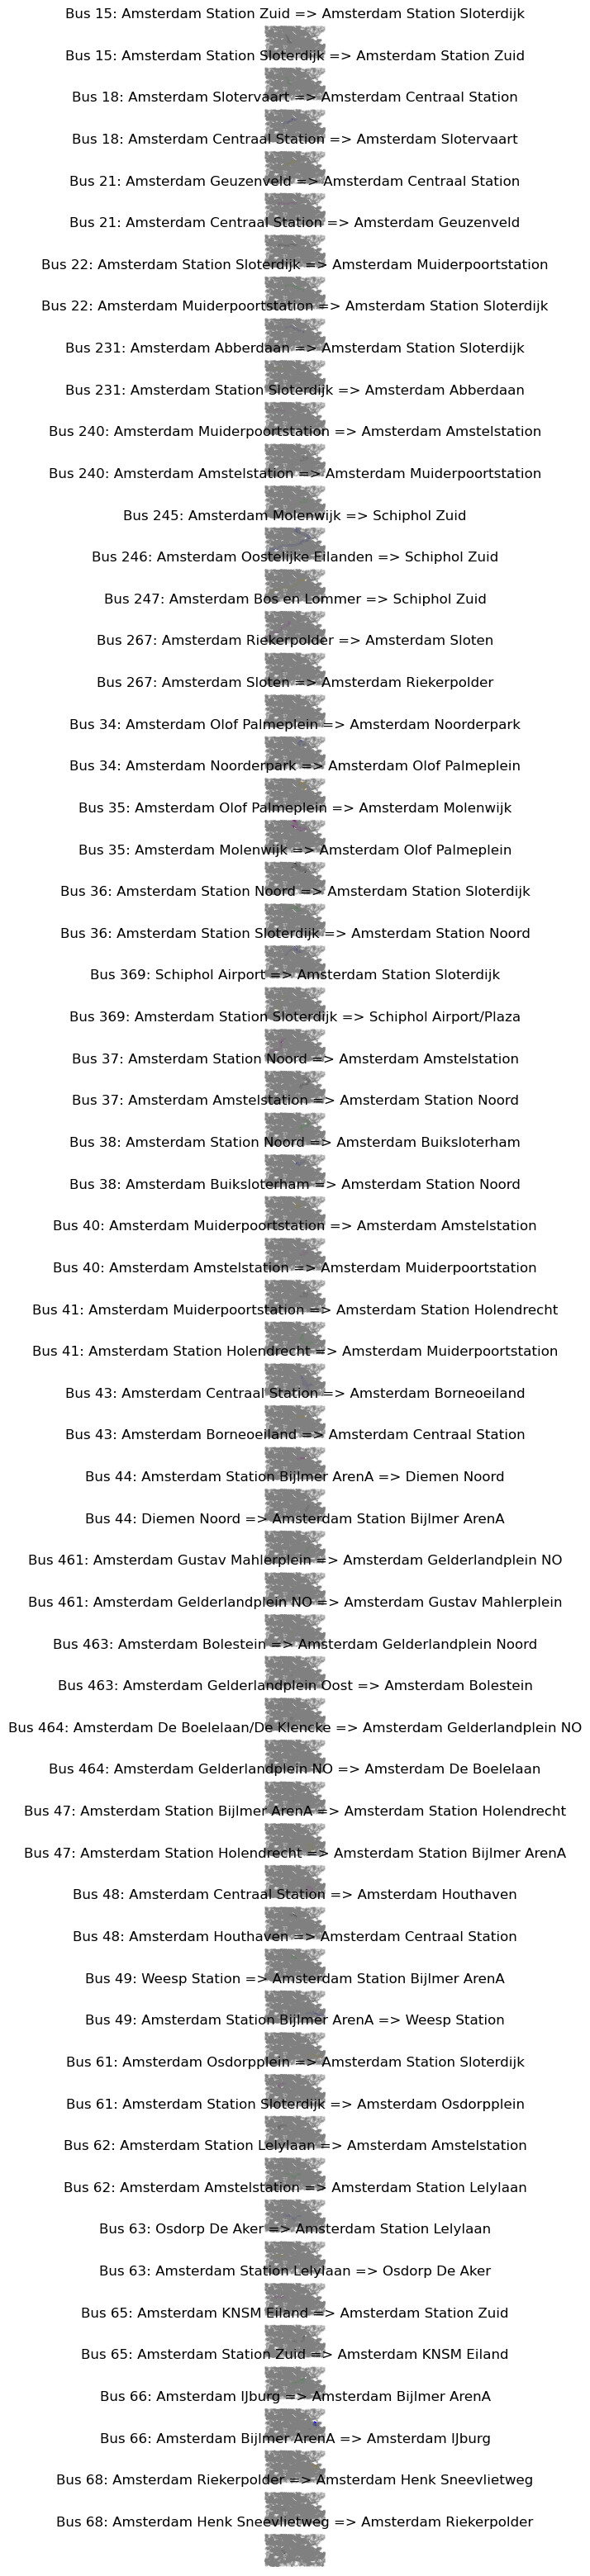

In [11]:
city_bus_order_route_dict, city_bus_shortest_path_pairs, city_bus_shortest_path_edges, bus_edges = bus(city_bus_stations, edges, nodes, city_bus_routes, city='Amsterdam')

In [12]:
bus_edges

,osm_id,geometry,service,id,from_id,to_id,distance,time,weights,to_from,from_to,railway
0,4436684,"LINESTRING (4.9683596 52.3558775, 4.9683345 52...",steps,0,0,1,4.049164,0.000324,4,"(0, 1)","(1, 0)",bus
1,4495957,"LINESTRING (4.8601784 52.357593, 4.8601399 52....",steps,1,2,3,7.754968,0.000620,7,"(2, 3)","(3, 2)",bus
2,4496429,"LINESTRING (4.8743983 52.358788, 4.8744747 52....",service,2,4,5,68.807947,0.005505,68,"(4, 5)","(5, 4)",bus
3,4727308,"LINESTRING (4.9563878 52.377293, 4.9564629 52....",path,3,6,65237,46.383298,0.003711,46,"(6, 65237)","(65237, 6)",bus
4,4727308,"LINESTRING (4.9564856 52.376881, 4.9564944 52....",path,4,65237,7,2.090290,0.000167,2,"(65237, 7)","(7, 65237)",bus
...,...,...,...,...,...,...,...,...,...,...,...,...
71623,1185077512,"LINESTRING (4.795149 52.3318873, 4.7953163 52....",service,71623,65586,65587,29.884042,0.002391,29,"(65586, 65587)","(65587, 65586)",bus
71624,1185077519,"LINESTRING (4.7974835 52.3325307, 4.7972201 52...",service,71624,65588,65589,19.267219,0.001541,19,"(65588, 65589)","(65589, 65588)",bus
71625,1185077520,"LINESTRING (4.7967795 52.3323057, 4.7972519 52...",service,71625,65590,65591,34.723141,0.002778,34,"(65590, 65591)","(65591, 65590)",bus
71626,1185077524,"LINESTRING (4.7997017 52.3324389, 4.7997688 52...",path,71626,65592,65593,65.462451,0.005237,65,"(65592, 65593)","(65593, 65592)",bus


## Add columns to nodes

In [13]:
city_bus_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_bus_order_route_dict, city_bus_routes)

In [14]:
city_bus_order_route_dict

{'Bus 15: Amsterdam Station Zuid => Amsterdam Station Sloterdijk':     id                   name                      geometry     geo_x  \
 0    6           Station Zuid  POINT (4.8720355 52.3408188)  4.872035   
 1    3    Prinses Irenestraat  POINT (4.8682898 52.3428941)   4.86829   
 2   10           Olympiaplein   POINT (4.865862 52.3462864)  4.865862   
 3    8             Olympiaweg  POINT (4.8583469 52.3452468)  4.858347   
 4   28  Haarlemmermeerstation  POINT (4.8576315 52.3492179)  4.857632   
 5   22             Zeilstraat  POINT (4.8566667 52.3512098)  4.856667   
 6   21        Amstelveenseweg  POINT (4.8560722 52.3513667)  4.856072   
 7    1         Hoofddorpplein  POINT (4.8503895 52.3520264)   4.85039   
 8   20   Haarlemmermeerstraat  POINT (4.8503138 52.3554125)  4.850314   
 9   23          Surinameplein  POINT (4.8521842 52.3580689)  4.852184   
 10  26        Corantijnstraat  POINT (4.8532685 52.3617315)  4.853269   
 11  24             Postjesweg    POINT (4.853

In [15]:
city_bus_new_nodes = add_columns_to_nodes(city_bus_order_route_dict, nodes)

In [16]:
city_bus_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.87204 52.34082),2,14779,Station Zuid,4.872035,52.340819,"(4.8720355, 52.3408188)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,"15, 62, 65","15, 62, 65"
1,POINT (4.86829 52.34289),2,67476,Prinses Irenestraat,4.868290,52.342894,"(4.8682898, 52.3428941)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,"15, 246, 65","15, 246, 65"
2,POINT (4.86586 52.34629),2,68204,Olympiaplein,4.865862,52.346286,"(4.865862, 52.3462864)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,15,None
3,POINT (4.85835 52.34525),2,68196,Olympiaweg,4.858347,52.345247,"(4.8583469, 52.3452468)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,15,None
4,POINT (4.85763 52.34922),2,68341,Haarlemmermeerstation,4.857632,52.349218,"(4.8576315, 52.3492179)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,"15, 62","15, 62"
...,...,...,...,...,...,...,...,...,...,...,...
752,POINT (4.99474 52.35561),2,67471,Diemerparklaan,4.994741,52.355608,"(4.9947414, 52.355608)",Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...,bus,66,None
753,POINT (4.82444 52.34041),3,15699,John M. Keynesplein,4.824444,52.340413,"(4.824444, 52.340413)",Bus 68: Amsterdam Riekerpolder => Amsterdam He...,bus,"267, 68","267, 68"
754,POINT (4.82789 52.34108),2,11244,IBM,4.827888,52.341080,"(4.827888, 52.3410803)",Bus 68: Amsterdam Riekerpolder => Amsterdam He...,bus,"267, 68","267, 68"
755,POINT (4.82867 52.34260),3,26843,Parkeerdek,4.828668,52.342595,"(4.8286682, 52.3425954)",Bus 68: Amsterdam Riekerpolder => Amsterdam He...,bus,68,None


### retrive all transfer stations on each route

In [17]:
city_bus_transfer_stations_df = all_transfer_stations_df(city_bus_new_nodes)

In [18]:
city_bus_transfer_stations_df

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.87204 52.34082),2,14779,Station Zuid,4.872035,52.340819,"(4.8720355, 52.3408188)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,"15, 62, 65","15, 62, 65"
1,POINT (4.86829 52.34289),2,67476,Prinses Irenestraat,4.868290,52.342894,"(4.8682898, 52.3428941)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,"15, 246, 65","15, 246, 65"
4,POINT (4.85763 52.34922),2,68341,Haarlemmermeerstation,4.857632,52.349218,"(4.8576315, 52.3492179)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,"15, 62","15, 62"
5,POINT (4.85667 52.35121),2,68268,Zeilstraat,4.856667,52.351210,"(4.8566667, 52.3512098)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,"15, 62","15, 62"
6,POINT (4.85607 52.35137),2,68266,Amstelveenseweg,4.856072,52.351367,"(4.8560722, 52.3513667)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,"15, 246, 62","15, 246, 62"
...,...,...,...,...,...,...,...,...,...,...,...
740,POINT (4.96581 52.31983),0,66747,Tulastraat,4.965810,52.319830,"(4.96581, 52.3198302)",Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...,bus,"41, 47, 66","41, 47, 66"
741,POINT (4.97152 52.32169),0,67123,Annie Romeinplein,4.971517,52.321685,"(4.9715166, 52.3216851)",Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...,bus,"41, 66","41, 66"
742,POINT (4.97323 52.32306),2,67461,Station Ganzenhoef,4.973228,52.323056,"(4.9732278, 52.323056)",Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...,bus,"41, 66","41, 66"
753,POINT (4.82444 52.34041),3,15699,John M. Keynesplein,4.824444,52.340413,"(4.824444, 52.340413)",Bus 68: Amsterdam Riekerpolder => Amsterdam He...,bus,"267, 68","267, 68"


In [19]:
len(city_bus_transfer_stations_df)

351

## Add columns to edges

In [20]:
city_bus_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_bus_shortest_path_edges, city_bus_routes)

In [21]:
city_bus_shortest_path_edges

{'Bus 15: Amsterdam Station Zuid => Amsterdam Station Sloterdijk':          osm_id                                           geometry  \
 0      26956728  LINESTRING (4.8720355 52.3408188, 4.8717707 52...   
 1      26956728  LINESTRING (4.8717707 52.3408097, 4.8716246 52...   
 2      26956728  LINESTRING (4.8705601 52.3407731, 4.8702988 52...   
 3      26956728  LINESTRING (4.8702988 52.3407626, 4.868856 52....   
 4      26982261  LINESTRING (4.8685173 52.3409372, 4.8684681 52...   
 ..          ...                                                ...   
 123   935010194  LINESTRING (4.8435054 52.3848361, 4.8436903 52...   
 124  1020818639  LINESTRING (4.8438138 52.3847277, 4.8438383 52...   
 125  1020818640  LINESTRING (4.8428612 52.3848254, 4.8435054 52...   
 126  1020818641  LINESTRING (4.8438898 52.3843611, 4.8439048 52...   
 127  1147115688  LINESTRING (4.8438493 52.3844829, 4.8438898 52...   
 
            service     id  from_id  to_id    distance      time  weights  \
 0 

In [22]:
city_bus_new_edges = add_columns_to_edges(city_bus_shortest_path_edges,edges)

In [23]:
city_bus_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,4436684,"LINESTRING (4.9683596 52.3558775, 4.9683345 52...",bus,steps,0,0,1,4.049164,0.000324,4,"(0, 1)","(1, 0)",NaN,NaN,NaN,NaN
1,4495957,"LINESTRING (4.8601784 52.357593, 4.8601399 52....",bus,steps,1,2,3,7.754968,0.000620,7,"(2, 3)","(3, 2)",NaN,NaN,NaN,NaN
2,4496429,"LINESTRING (4.8743983 52.358788, 4.8744747 52....",bus,service,2,4,5,68.807947,0.005505,68,"(4, 5)","(5, 4)",NaN,NaN,NaN,NaN
3,4727308,"LINESTRING (4.9563878 52.377293, 4.9564629 52....",bus,path,3,6,65237,46.383298,0.003711,46,"(6, 65237)","(65237, 6)",NaN,NaN,NaN,NaN
4,4727308,"LINESTRING (4.9564856 52.376881, 4.9564944 52....",bus,path,4,65237,7,2.090290,0.000167,2,"(65237, 7)","(7, 65237)",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71623,1185077512,"LINESTRING (4.795149 52.3318873, 4.7953163 52....",bus,service,71623,65586,65587,29.884042,0.002391,29,"(65586, 65587)","(65587, 65586)",NaN,NaN,NaN,NaN
71624,1185077519,"LINESTRING (4.7974835 52.3325307, 4.7972201 52...",bus,service,71624,65588,65589,19.267219,0.001541,19,"(65588, 65589)","(65589, 65588)",NaN,NaN,NaN,NaN
71625,1185077520,"LINESTRING (4.7967795 52.3323057, 4.7972519 52...",bus,service,71625,65590,65591,34.723141,0.002778,34,"(65590, 65591)","(65591, 65590)",NaN,NaN,NaN,NaN
71626,1185077524,"LINESTRING (4.7997017 52.3324389, 4.7997688 52...",bus,path,71626,65592,65593,65.462451,0.005237,65,"(65592, 65593)","(65593, 65592)",NaN,NaN,NaN,NaN


## Test 1

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [33]:
s_e_coordinates_t1 = {
    's_coordinates_x': 4.904378545407982,
    's_coordinates_y': 52.37447353144937, 
    'e_coordinates_x': 4.873038033862007, 
    'e_coordinates_y': 52.341349038904255
} 

In [34]:
start_node, end_node = s_e_node_df(s_e_coordinates_t1, city_bus_new_nodes)

In [35]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
119,POINT (4.90655 52.37346),2,67284,Prins Hendrikkade,4.906552,52.373463,"(4.9065518, 52.373463)",Bus 22: Amsterdam Station Sloterdijk => Amster...,bus,"22, 43","22, 43"


In [36]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
30,POINT (4.87278 52.34074),2,42437,Station Zuid,4.872782,52.340739,"(4.8727824, 52.3407386)",Bus 15: Amsterdam Station Sloterdijk => Amster...,bus,"15, 62, 65","15, 62, 65"


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [37]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [38]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

Any of e_on_route is not the same as any of s_on_route 

The next step is to find transfer stations of e_on_route and s_on_route----using function 'transfer_station'


### Find transfer stations----transfer_station_one_mode

In [39]:
t_station_node = transfer_station_one_mode(city_bus_routes, start_node, end_node, city_bus_new_nodes, city_bus_order_route_dict)

In [40]:
t_station_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
109,POINT (4.83877 52.38801),2,19788,Station Sloterdijk,4.83877,52.38801,"(4.8387698, 52.3880096)",Bus 22: Amsterdam Station Sloterdijk => Amster...,bus,"15, 22, 231, 36, 369, 61","15, 22, 231, 36, 369, 61"


### Get all stations between s_e nodes and transfer nodes

In [41]:
s_on_route_ref,t_on_route_ref = s_e_on_route_ref(start_node, t_station_node)

In [42]:
s_t_same_routes_df = s_e_same_routes(s_on_route_ref,t_on_route_ref)
s_t_same_routes_df

s_node and e_node are on same route/routes:  ref
0  22



,ref
0,22


In [43]:
all_stations_on_matched_routes_dfs_s_t = all_stations_on_matched_routes(s_t_same_routes_df,city_bus_routes,start_node,t_station_node,city_bus_order_route_dict)
all_stations_on_matched_routes_dfs_s_t

[    id                   name                      geometry     geo_x  \
 0   15     Station Sloterdijk  POINT (4.8387698 52.3880096)   4.83877   
 1    3          La Guardiaweg  POINT (4.8403476 52.3915236)  4.840348   
 2   24               Kabelweg  POINT (4.8486876 52.3917417)  4.848688   
 3   14             Contactweg  POINT (4.8567562 52.3920094)  4.856756   
 4   13       Spaarndammerdijk   POINT (4.8620399 52.392447)   4.86204   
 5   39             Zaanstraat    POINT (4.86985 52.3928793)   4.86985   
 6   40     Spaarndammerstraat  POINT (4.8771658 52.3923825)  4.877166   
 7   17       Assendelftstraat  POINT (4.8798373 52.3888866)  4.879837   
 8   19            Nassauplein  POINT (4.8814896 52.3852578)   4.88149   
 9   38        Haarlemmerplein  POINT (4.8836597 52.3851357)   4.88366   
 10  33    Buiten Oranjestraat  POINT (4.8880371 52.3831468)  4.888037   
 11  34  Buiten Brouwersstraat  POINT (4.8915473 52.3815327)  4.891547   
 12  21       Centraal Station  POINT 

In [44]:
btw_stations_each_way_list_s_t = btw_stations_each_way_list(start_node,t_station_node,all_stations_on_matched_routes_dfs_s_t)
btw_stations_each_way_list_s_t

[    id                   name                      geometry     geo_x  \
 13   2      Prins Hendrikkade   POINT (4.9065518 52.373463)  4.906552   
 12  21       Centraal Station  POINT (4.9025698 52.3792093)   4.90257   
 11  34  Buiten Brouwersstraat  POINT (4.8915473 52.3815327)  4.891547   
 10  33    Buiten Oranjestraat  POINT (4.8880371 52.3831468)  4.888037   
 9   38        Haarlemmerplein  POINT (4.8836597 52.3851357)   4.88366   
 8   19            Nassauplein  POINT (4.8814896 52.3852578)   4.88149   
 7   17       Assendelftstraat  POINT (4.8798373 52.3888866)  4.879837   
 6   40     Spaarndammerstraat  POINT (4.8771658 52.3923825)  4.877166   
 5   39             Zaanstraat    POINT (4.86985 52.3928793)   4.86985   
 4   13       Spaarndammerdijk   POINT (4.8620399 52.392447)   4.86204   
 3   14             Contactweg  POINT (4.8567562 52.3920094)  4.856756   
 2   24               Kabelweg  POINT (4.8486876 52.3917417)  4.848688   
 1    3          La Guardiaweg  POINT 

In [45]:
t_on_route_ref,e_on_route_ref = s_e_on_route_ref( t_station_node,end_node)

In [46]:
t_e_same_routes_df = s_e_same_routes(t_on_route_ref,e_on_route_ref)
t_e_same_routes_df

s_node and e_node are on same route/routes:  ref
0  15



,ref
0,15


In [47]:
all_stations_on_matched_routes_dfs_t_e = all_stations_on_matched_routes(t_e_same_routes_df,city_bus_routes,t_station_node,end_node,city_bus_order_route_dict)
all_stations_on_matched_routes_dfs_t_e

[    id                   name                      geometry     geo_x  \
 0    5     Station Sloterdijk  POINT (4.8388077 52.3877091)  4.838808   
 1   20     Bos en Lommerplein  POINT (4.8464834 52.3772052)  4.846483   
 2   17          Erasmusgracht  POINT (4.8469526 52.3763271)  4.846953   
 3   19    Jan van Galenstraat  POINT (4.8487471 52.3729851)  4.848747   
 4   14          Mercatorplein  POINT (4.8500926 52.3704116)  4.850093   
 5   16      W. Schoutenstraat   POINT (4.8525714 52.366991)  4.852571   
 6   28             Postjesweg  POINT (4.8531765 52.3638554)  4.853177   
 7   30        Corantijnstraat  POINT (4.8532711 52.3615936)  4.853271   
 8    6          Surinameplein  POINT (4.8522845 52.3581748)  4.852284   
 9    3   Haarlemmermeerstraat   POINT (4.8503283 52.355174)  4.850328   
 10   2         Hoofddorpplein  POINT (4.8503895 52.3520264)   4.85039   
 11  25        Amstelveenseweg  POINT (4.8560722 52.3513667)  4.856072   
 12  26             Zeilstraat  POINT 

In [48]:
btw_stations_each_way_list_t_e = btw_stations_each_way_list(t_station_node,end_node,all_stations_on_matched_routes_dfs_t_e)
btw_stations_each_way_list_t_e

[    id                   name                      geometry     geo_x  \
 0    5     Station Sloterdijk  POINT (4.8388077 52.3877091)  4.838808   
 1   20     Bos en Lommerplein  POINT (4.8464834 52.3772052)  4.846483   
 2   17          Erasmusgracht  POINT (4.8469526 52.3763271)  4.846953   
 3   19    Jan van Galenstraat  POINT (4.8487471 52.3729851)  4.848747   
 4   14          Mercatorplein  POINT (4.8500926 52.3704116)  4.850093   
 5   16      W. Schoutenstraat   POINT (4.8525714 52.366991)  4.852571   
 6   28             Postjesweg  POINT (4.8531765 52.3638554)  4.853177   
 7   30        Corantijnstraat  POINT (4.8532711 52.3615936)  4.853271   
 8    6          Surinameplein  POINT (4.8522845 52.3581748)  4.852284   
 9    3   Haarlemmermeerstraat   POINT (4.8503283 52.355174)  4.850328   
 10   2         Hoofddorpplein  POINT (4.8503895 52.3520264)   4.85039   
 11  25        Amstelveenseweg  POINT (4.8560722 52.3513667)  4.856072   
 12  26             Zeilstraat  POINT 

### Get all nodes and id_pairs of nodes between s_e nodes

In [49]:
btw_all_id_pairs_list_s_t = btw_all_ids_pairs(btw_stations_each_way_list_s_t,city_bus_new_nodes)
btw_all_id_pairs_list_s_t

[     s_id   e_id
 0   68144  67846
 1   67846  67847
 2   67847  19788
 3   19788  67336
 4   67336  67497
 5   67497  67440
 6   67440  67437
 7   67437  68154
 8   68154  68171
 9   68171  67445
 10  67445  67447
 11  67447  28278
 12  28278  67284,
      s_id   e_id
 0   28277  67482
 1   67482  67483
 2   67483  68083
 3   68083  19788
 4   19788  67909
 5   67909  67287
 6   67287  67448
 7   67448  67446
 8   67446  67436
 9   67436  68155
 10  68155  67438
 11  67438  67439
 12  67439  67498
 13  67498  67337]

In [50]:
btw_all_id_pairs_list_t_e = btw_all_ids_pairs(btw_stations_each_way_list_t_e,city_bus_new_nodes)
btw_all_id_pairs_list_t_e

[     s_id   e_id
 0   68268  68266
 1   68266  67396
 2   67396  68235
 3   68235  23651
 4   23651  68238
 5   68238  68237
 6   68237  68230
 7   68230  68234
 8   68234  68282
 9   68282  68285
 10  68285  67578
 11  67578  67474
 12  67474  68326
 13  68326  68195
 14  68195  68203
 15  68203  67475
 16  67475  42437]

### Calculate shortest path and plot

In [51]:
btw_all_id_pairs_list_unique_s_t = drop_df_in_list(btw_all_id_pairs_list_s_t)

At least one dataframe in the list(btw_all_id_pairs_list) is different


In [52]:
btw_all_id_pairs_list_unique_t_e = drop_df_in_list(btw_all_id_pairs_list_t_e)

All dataframes in the list are the same


In [53]:
G = create_ground_graph(edges, nodes)

In [54]:
shortest_path_pairs_way_s_t = all_shortest_paths(G, btw_all_id_pairs_list_unique_s_t[0], edges)

In [55]:
shortest_path_pairs_way_s_t

,osm_id,geometry,service,id,from_id,to_id,distance,time,weights,to_from,from_to,railway
37882,445997918,"LINESTRING (4.8880371 52.3831468, 4.8878285 52...",busway,37882,67846,67483,20.661600,0.001653,20,"(67846, 67483)","(67483, 67846)",bus
37883,445997918,"LINESTRING (4.8878285 52.3832817, 4.8875825 52...",busway,37883,67483,19166,351.545818,0.028124,351,"(67483, 19166)","(19166, 67483)",bus
37884,445997918,"LINESTRING (4.8839457 52.3853169, 4.883873 52....",busway,37884,19166,28884,7.853400,0.000628,7,"(19166, 28884)","(28884, 19166)",bus
44695,616339742,"LINESTRING (4.8838357 52.3852964, 4.8838086 52...",busway,44695,28884,15474,13.508956,0.001081,13,"(28884, 15474)","(15474, 28884)",bus
44696,616339742,"LINESTRING (4.8837135 52.3852027, 4.8836597 52...",busway,44696,15474,68144,8.305049,0.000664,8,"(15474, 68144)","(68144, 15474)",bus
...,...,...,...,...,...,...,...,...,...,...,...,...
47377,678935762,"LINESTRING (4.9045326 52.3778212, 4.9039679 52...",construction,47377,28469,37273,88.809630,0.007105,88,"(28469, 37273)","(37273, 28469)",bus
49994,738357506,"LINESTRING (4.9034461 52.3787375, 4.9028925 52...",busway,49994,26765,16583,44.088746,0.003527,44,"(26765, 16583)","(16583, 26765)",bus
50964,757674011,"LINESTRING (4.9045451 52.3783887, 4.9048507 52...",busway,50964,16999,28468,27.044948,0.002164,27,"(16999, 28468)","(28468, 16999)",bus
57277,866310233,"LINESTRING (4.903414 52.3766144, 4.9031423 52....",construction,57277,18309,18416,38.452090,0.003076,38,"(18309, 18416)","(18416, 18309)",bus


In [56]:
duplicate_row_count_way_s_t, shortest_path_edges_way_s_t, edges_way_s_t = edges_with_count_weight(shortest_path_pairs_way_s_t, edges)

In [57]:
shortest_path_edges_way_s_t

,osm_id,geometry,service,id,from_id,to_id,distance,time,weights,to_from,from_to,railway,count_weight
0,445997918,"LINESTRING (4.8880371 52.3831468, 4.8878285 52...",busway,37882,67846,67483,20.661600,0.001653,20,"(67846, 67483)","(67483, 67846)",bus,3.0
1,445997918,"LINESTRING (4.8878285 52.3832817, 4.8875825 52...",busway,37883,67483,19166,351.545818,0.028124,351,"(67483, 19166)","(19166, 67483)",bus,3.0
2,445997918,"LINESTRING (4.8839457 52.3853169, 4.883873 52....",busway,37884,19166,28884,7.853400,0.000628,7,"(19166, 28884)","(28884, 19166)",bus,3.0
3,616339742,"LINESTRING (4.8838357 52.3852964, 4.8838086 52...",busway,44695,28884,15474,13.508956,0.001081,13,"(28884, 15474)","(15474, 28884)",bus,3.0
4,616339742,"LINESTRING (4.8837135 52.3852027, 4.8836597 52...",busway,44696,15474,68144,8.305049,0.000664,8,"(15474, 68144)","(68144, 15474)",bus,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,678935762,"LINESTRING (4.9045326 52.3778212, 4.9039679 52...",construction,47377,28469,37273,88.809630,0.007105,88,"(28469, 37273)","(37273, 28469)",bus,1.0
214,738357506,"LINESTRING (4.9034461 52.3787375, 4.9028925 52...",busway,49994,26765,16583,44.088746,0.003527,44,"(26765, 16583)","(16583, 26765)",bus,1.0
215,757674011,"LINESTRING (4.9045451 52.3783887, 4.9048507 52...",busway,50964,16999,28468,27.044948,0.002164,27,"(16999, 28468)","(28468, 16999)",bus,1.0
216,866310233,"LINESTRING (4.903414 52.3766144, 4.9031423 52....",construction,57277,18309,18416,38.452090,0.003076,38,"(18309, 18416)","(18416, 18309)",bus,1.0


In [58]:
shortest_path_pairs_way_t_e = all_shortest_paths(G, btw_all_id_pairs_list_unique_t_e[0], edges)

In [59]:
shortest_path_pairs_way_t_e

,osm_id,geometry,service,id,from_id,to_id,distance,time,weights,to_from,from_to,railway
50240,740407528,"LINESTRING (4.8560722 52.3513667, 4.8561004 52...",tertiary,50240,68266,16444,32.365885,0.002589,32,"(68266, 16444)","(16444, 68266)",bus
51754,772868271,"LINESTRING (4.856506 52.351485, 4.8565125 52.3...",secondary,51754,16444,68268,32.516448,0.002601,32,"(16444, 68268)","(68268, 16444)",bus
11834,7381646,"LINESTRING (4.8503633 52.3515282, 4.8503718 52...",secondary,11834,10151,10060,23.308806,0.001865,23,"(10151, 10060)","(10060, 10151)",bus
11837,7381651,"LINESTRING (4.8503877 52.3511819, 4.8503846 52...",secondary,11837,10156,10151,38.707189,0.003097,38,"(10156, 10151)","(10151, 10156)",bus
12246,7382916,"LINESTRING (4.8503953 52.3517351, 4.8503895 52...",secondary,12246,10060,67396,32.409887,0.002593,32,"(10060, 67396)","(67396, 10060)",bus
...,...,...,...,...,...,...,...,...,...,...,...,...
47134,673956735,"LINESTRING (4.8702638 52.3406287, 4.8705732 52...",tertiary,47134,31002,31003,21.151685,0.001692,21,"(31002, 31003)","(31003, 31002)",bus
47135,673956735,"LINESTRING (4.8705732 52.340644, 4.8716307 52....",tertiary,47135,31003,42437,150.906647,0.012073,150,"(31003, 42437)","(42437, 31003)",bus
68490,1115722788,"LINESTRING (4.8682675 52.3414389, 4.8683208 52...",secondary,68490,62655,14828,56.754439,0.004540,56,"(62655, 14828)","(14828, 62655)",bus
68491,1115722789,"LINESTRING (4.8682569 52.3419806, 4.8682786 52...",secondary,68491,62656,62655,60.341851,0.004827,60,"(62656, 62655)","(62655, 62656)",bus


In [60]:
duplicate_row_count_way_t_e, shortest_path_edges_way_t_e, edges_way_t_e = edges_with_count_weight(shortest_path_pairs_way_t_e, edges)

In [61]:
shortest_path_edges_way_t_e

,osm_id,geometry,service,id,from_id,to_id,distance,time,weights,to_from,from_to,railway,count_weight
0,740407528,"LINESTRING (4.8560722 52.3513667, 4.8561004 52...",tertiary,50240,68266,16444,32.365885,0.002589,32,"(68266, 16444)","(16444, 68266)",bus,2.0
1,772868271,"LINESTRING (4.856506 52.351485, 4.8565125 52.3...",secondary,51754,16444,68268,32.516448,0.002601,32,"(16444, 68268)","(68268, 16444)",bus,2.0
2,7381646,"LINESTRING (4.8503633 52.3515282, 4.8503718 52...",secondary,11834,10151,10060,23.308806,0.001865,23,"(10151, 10060)","(10060, 10151)",bus,2.0
3,7381651,"LINESTRING (4.8503877 52.3511819, 4.8503846 52...",secondary,11837,10156,10151,38.707189,0.003097,38,"(10156, 10151)","(10151, 10156)",bus,2.0
4,7382916,"LINESTRING (4.8503953 52.3517351, 4.8503895 52...",secondary,12246,10060,67396,32.409887,0.002593,32,"(10060, 67396)","(67396, 10060)",bus,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,673956735,"LINESTRING (4.8702638 52.3406287, 4.8705732 52...",tertiary,47134,31002,31003,21.151685,0.001692,21,"(31002, 31003)","(31003, 31002)",bus,1.0
223,673956735,"LINESTRING (4.8705732 52.340644, 4.8716307 52....",tertiary,47135,31003,42437,150.906647,0.012073,150,"(31003, 42437)","(42437, 31003)",bus,1.0
224,1115722788,"LINESTRING (4.8682675 52.3414389, 4.8683208 52...",secondary,68490,62655,14828,56.754439,0.004540,56,"(62655, 14828)","(14828, 62655)",bus,1.0
225,1115722789,"LINESTRING (4.8682569 52.3419806, 4.8682786 52...",secondary,68491,62656,62655,60.341851,0.004827,60,"(62656, 62655)","(62655, 62656)",bus,1.0


In [62]:
shortest_path_edges_way = pd.concat([shortest_path_edges_way_s_t,shortest_path_edges_way_t_e])
shortest_path_edges_way

,osm_id,geometry,service,id,from_id,to_id,distance,time,weights,to_from,from_to,railway,count_weight
0,445997918,"LINESTRING (4.8880371 52.3831468, 4.8878285 52...",busway,37882,67846,67483,20.661600,0.001653,20,"(67846, 67483)","(67483, 67846)",bus,3.0
1,445997918,"LINESTRING (4.8878285 52.3832817, 4.8875825 52...",busway,37883,67483,19166,351.545818,0.028124,351,"(67483, 19166)","(19166, 67483)",bus,3.0
2,445997918,"LINESTRING (4.8839457 52.3853169, 4.883873 52....",busway,37884,19166,28884,7.853400,0.000628,7,"(19166, 28884)","(28884, 19166)",bus,3.0
3,616339742,"LINESTRING (4.8838357 52.3852964, 4.8838086 52...",busway,44695,28884,15474,13.508956,0.001081,13,"(28884, 15474)","(15474, 28884)",bus,3.0
4,616339742,"LINESTRING (4.8837135 52.3852027, 4.8836597 52...",busway,44696,15474,68144,8.305049,0.000664,8,"(15474, 68144)","(68144, 15474)",bus,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,673956735,"LINESTRING (4.8702638 52.3406287, 4.8705732 52...",tertiary,47134,31002,31003,21.151685,0.001692,21,"(31002, 31003)","(31003, 31002)",bus,1.0
223,673956735,"LINESTRING (4.8705732 52.340644, 4.8716307 52....",tertiary,47135,31003,42437,150.906647,0.012073,150,"(31003, 42437)","(42437, 31003)",bus,1.0
224,1115722788,"LINESTRING (4.8682675 52.3414389, 4.8683208 52...",secondary,68490,62655,14828,56.754439,0.004540,56,"(62655, 14828)","(14828, 62655)",bus,1.0
225,1115722789,"LINESTRING (4.8682569 52.3419806, 4.8682786 52...",secondary,68491,62656,62655,60.341851,0.004827,60,"(62656, 62655)","(62655, 62656)",bus,1.0


<Axes: >

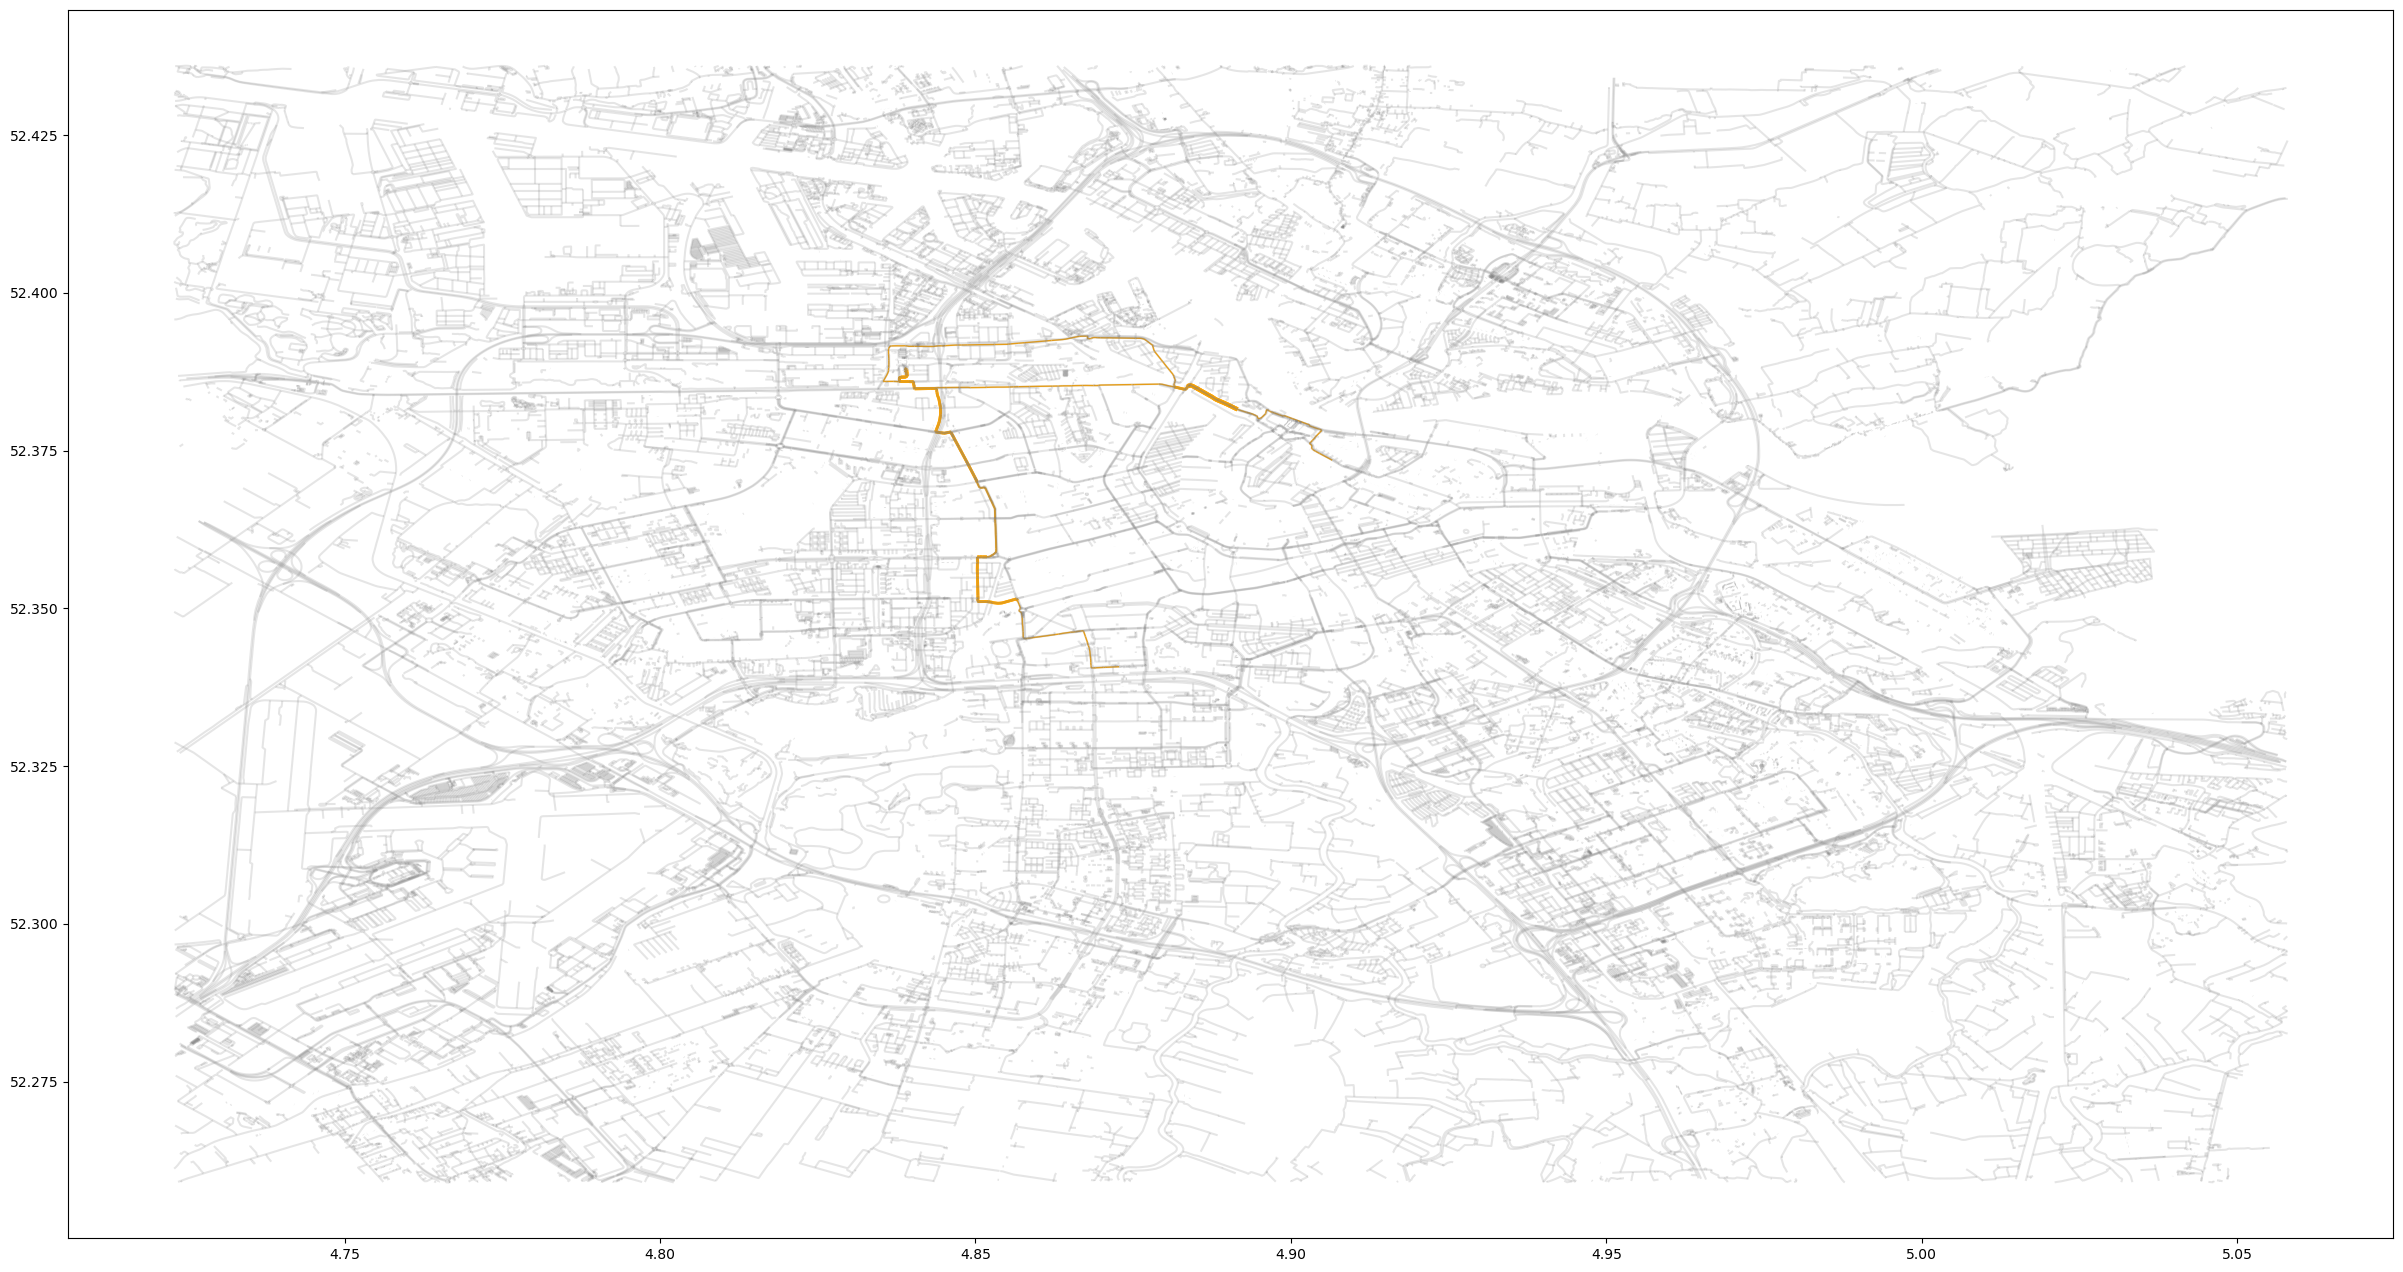

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(city_bus_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')